# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [6]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

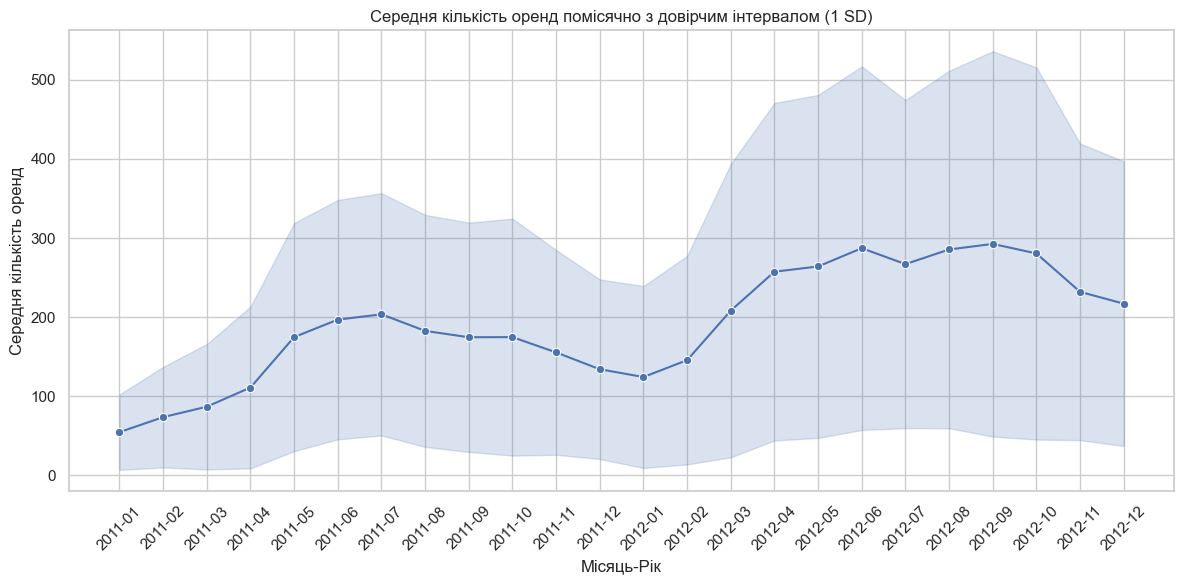

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x='month_year',
    y='count',  
    errorbar='sd',   
    marker = 'o'
)
plt.xticks(rotation=45)
plt.title('Середня кількість оренд помісячно з довірчим інтервалом (1 SD)')
plt.xlabel('Місяць-Рік')
plt.ylabel('Середня кількість оренд')
plt.tight_layout()
plt.show()

На графіку найбільша варіативність даних з квітня 2012 по жовтень 2012

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

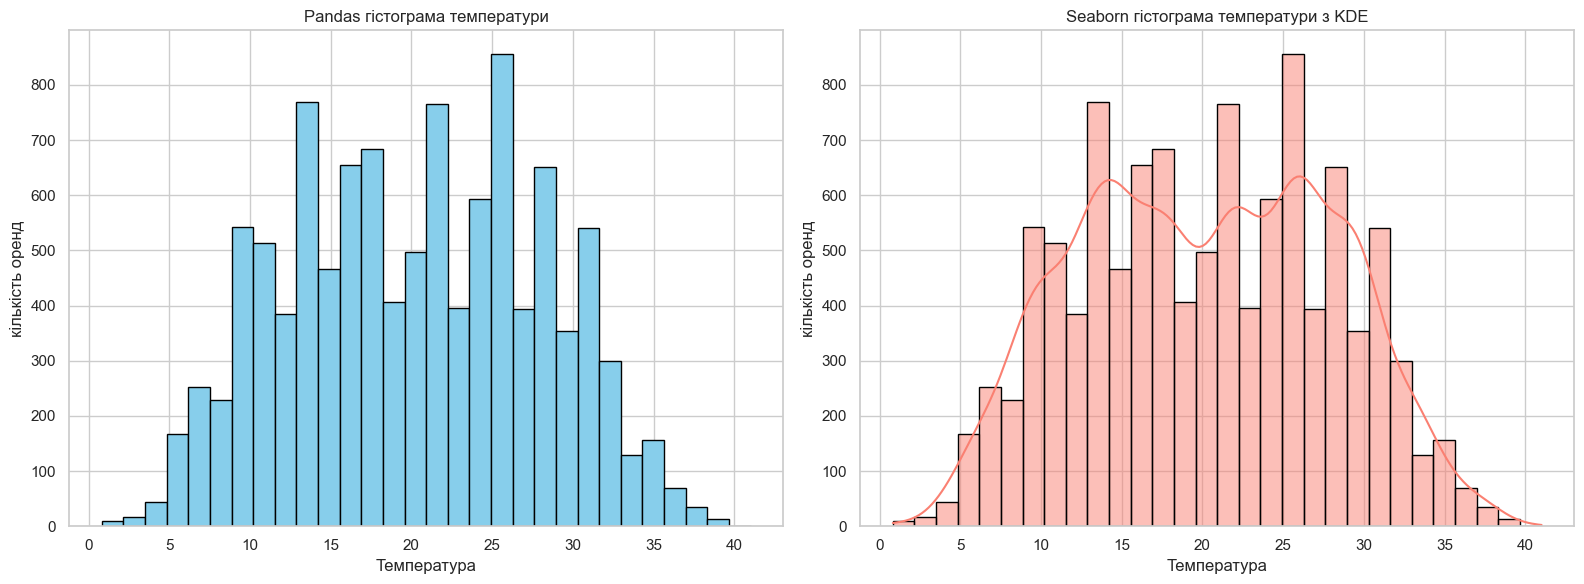

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
bins = 30
df['temp'].plot.hist(
    ax=axes[0],
    bins=bins,
    color='skyblue',
    edgecolor='black',
    grid = True
)
axes[0].set_title('Pandas гістограма температури')
axes[0].set_xlabel('Температура')
axes[0].set_ylabel('кількість оренд')

sns.histplot(
    data=df,
    x='temp',
    bins=bins,
    kde=True,
    ax=axes[1],
    color='salmon',
    edgecolor='black'
)
axes[1].set_title('Seaborn гістограма температури з KDE')
axes[1].set_xlabel('Температура')
axes[1].set_ylabel('кількість оренд')
plt.tight_layout()
plt.show()

Візуальної різниці між двома графіками не має. (Якщо не брати до уваги лінію KDE). На графіку Pandas grid також як сітка, хоча в стандартному вигляді є лише горизонтальні лінії. На даному графіку в Pandas сітка, тому що  був раніше встановлений стиль  seaborn, тому надалі всі графіки Pandas будуть змінені, тому що seaborn змінює глобальні налаштування Matplotlib.
Лінія на графіку KDE це оцінка щільності ймовірності. це гладка крива, яка наближено показує форму розподілу. Вона згладжує гістограму і дозволяє краще побачити, де зосереджені основні піки в розподілі температури.


## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

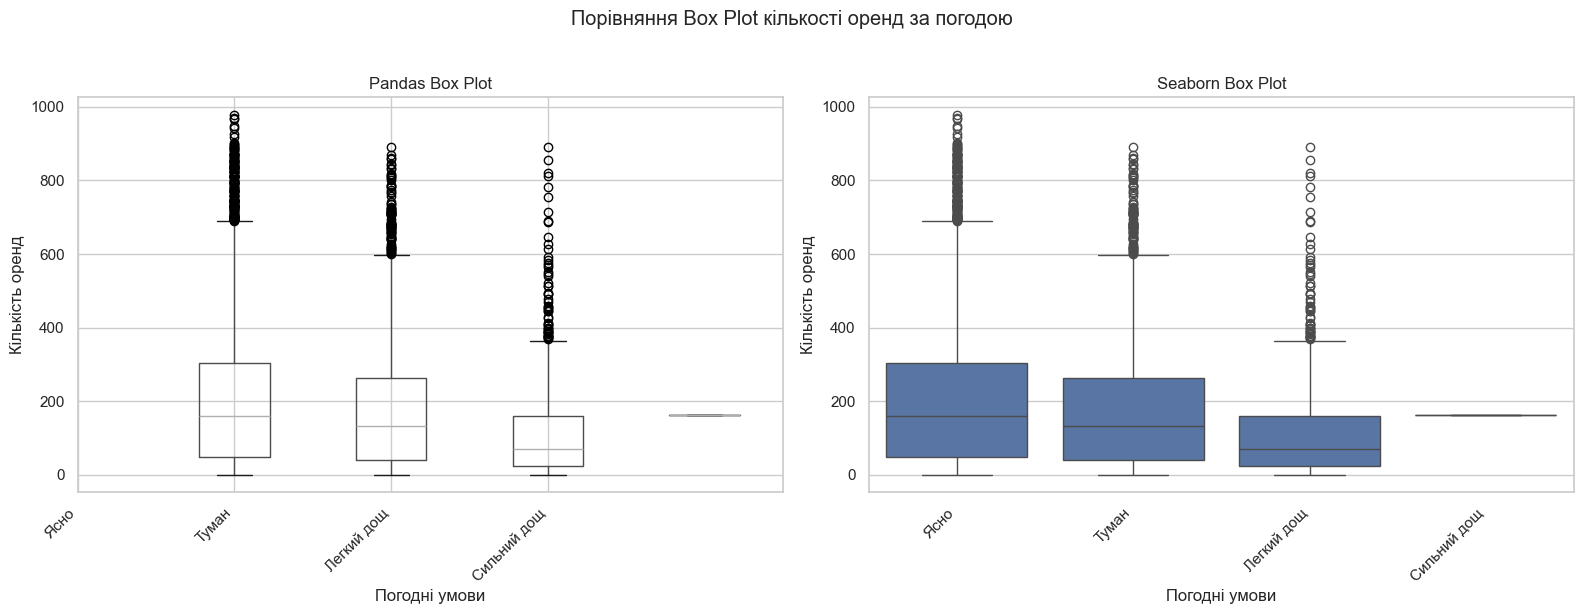

In [9]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df.boxplot(column='count', by='weather', ax=axes[0])
axes[0].set_title('Pandas Box Plot')
axes[0].set_xlabel('Погодні умови')
axes[0].set_ylabel('Кількість оренд')

unique_ticks = sorted(df['weather'].unique())
axes[0].set_xticks(range(len(unique_ticks)))
axes[0].set_xticklabels([weather_labels.get(tick, str(tick)) for tick in unique_ticks], rotation=45, ha='right')

sns.boxplot(data=df, x='weather', y='count', ax=axes[1])
axes[1].set_title('Seaborn Box Plot')
axes[1].set_xlabel('Погодні умови')
axes[1].set_ylabel('Кількість оренд')

axes[1].set_xticks(range(len(unique_ticks)))
axes[1].set_xticklabels([weather_labels.get(tick, str(tick)) for tick in unique_ticks], rotation=45, ha='right')

plt.suptitle('Порівняння Box Plot кількості оренд за погодою', y=1.02)
plt.tight_layout()
plt.show()


Графіки візуально однакові, лише box на графіку Seaborn відразу заливка, що відразу виділяє їх на фоні графіку. 

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


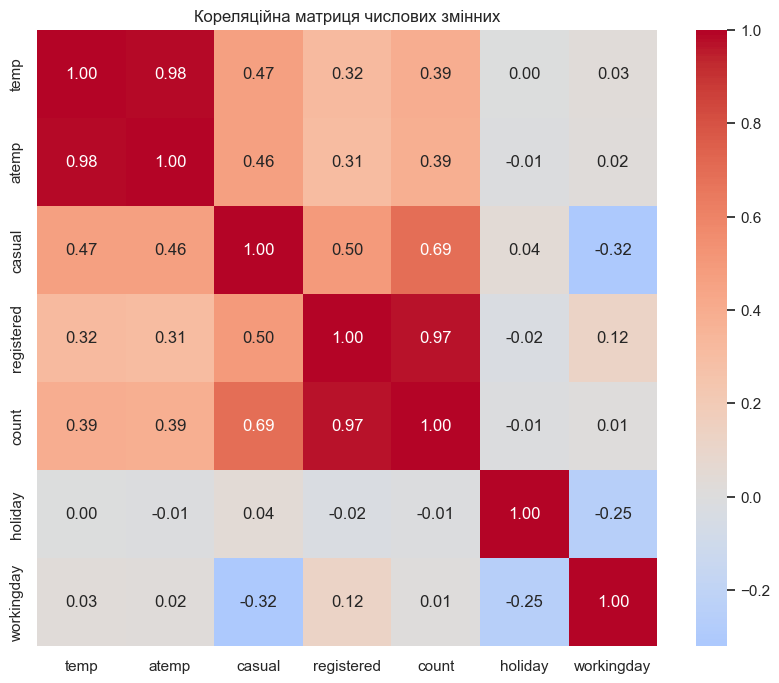

In [10]:
numeric_cols = ['temp', 'atemp', 'casual', 'registered', 'count', 'holiday', 'workingday']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)

plt.title('Кореляційна матриця числових змінних')
plt.show()

Найвища кореляція з count: registered — 0.97 , casual — 0.69. Спостерігається позитивна кореляція.  Загальна кількість оренди найбільше залежить від кількості зареєстрованих користувачів, і значною мірою — від випадкових (casual) клієнтів.
Кореляція між temp та atemp 0.98. Чому так? Тому що temp — фактична температура, atemp — як відчувається температура. Так як ці дві змінні дуже схожі, оскільки показник як відчувається температура розраховується на основі фактичної температури з відповідним коригуванням на вологість та вітер. Тому ці показники  сильно корелюють.
Негативна кореляція в наступних показниках: casual і workingday -0.32. У будні дні менше випадкових (не зареєстрованих) користувачів. 
holiday і workingday -0.25. Свята рідко припадають на робочі дні, тому спостерігається зворотний зв'язок.


## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


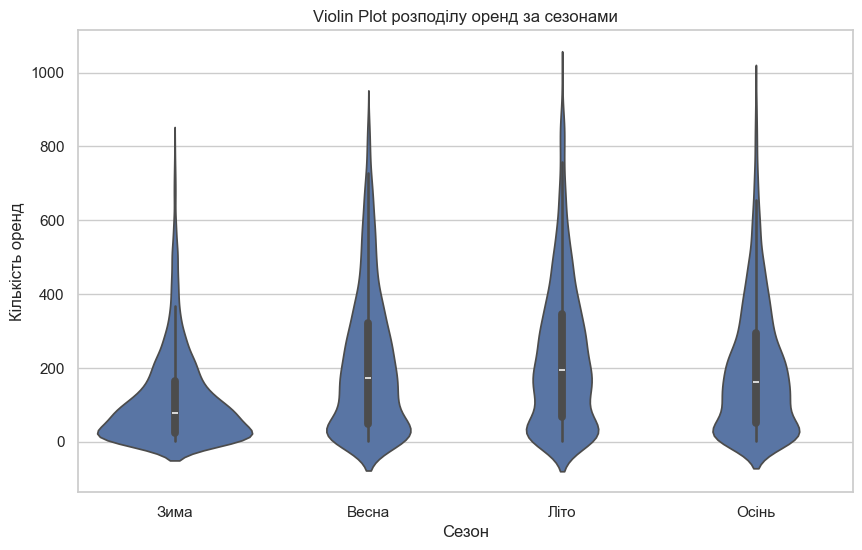

In [11]:
season_labels = {
    1: 'Зима',
    2: 'Весна',
    3: 'Літо',
    4: 'Осінь'
}

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='season', y='count',  legend=False, inner='box')

plt.xticks(ticks=[0, 1, 2, 3], labels=[season_labels[i+1] for i in range(4)])
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.title('Violin Plot розподілу оренд за сезонами')
plt.show()

Товщина Violin Plot показує кількість значень. Де "скрипка" ширше значень більше, де вужча — значень менше.
Найбільша варіабельність оренди в сезоні Літо.
Переваги даного графіка над Box plot в тому, що можна побачити форму розподілу, більш гнучка форма, можна побачити мультимоду, а також асиметричність розподілу даних.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

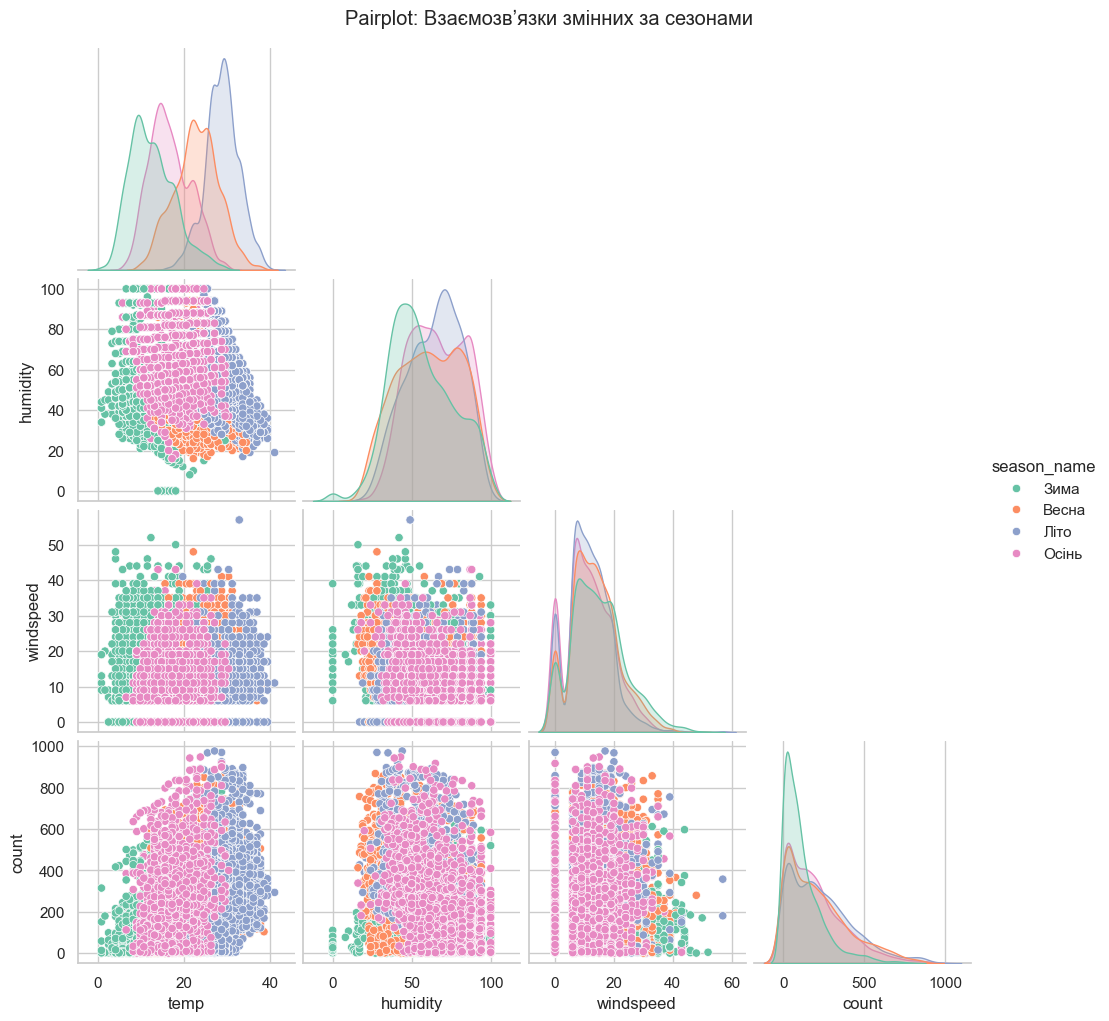

In [17]:
df['season_name'] = df['season'].map({
    1: 'Зима',
    2: 'Весна',
    3: 'Літо',
    4: 'Осінь'
})

selected_cols = ['temp', 'humidity', 'windspeed', 'count', 'season_name']

sns.pairplot(df[selected_cols], hue='season_name', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairplot: Взаємозвʼязки змінних за сезонами', y=1.02)
plt.show()

Найсильніший лінійний зв'язок — між temp (температурою) та count (кількістю оренд) - чим вища температура, тим більше користувачів орендують велосипеди. Всі сезони показують позитивну кореляцію, хоча взимку цей зв'язок дещо слабший.

humidity (вологість) — має найпомітніші сезонні коливання:
взимку - вологість висока
влітку - вологість нижча
весна та осінь -  середній рівень вологості.

Також можна зазначити, що:
temp має сезонний розкид що є  логічним.

windspeed змінюється не так сильно, але взимку й восени є багато нульових значень

count змінюється залежно від сезону. Найвищий попит влітку та восени



## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

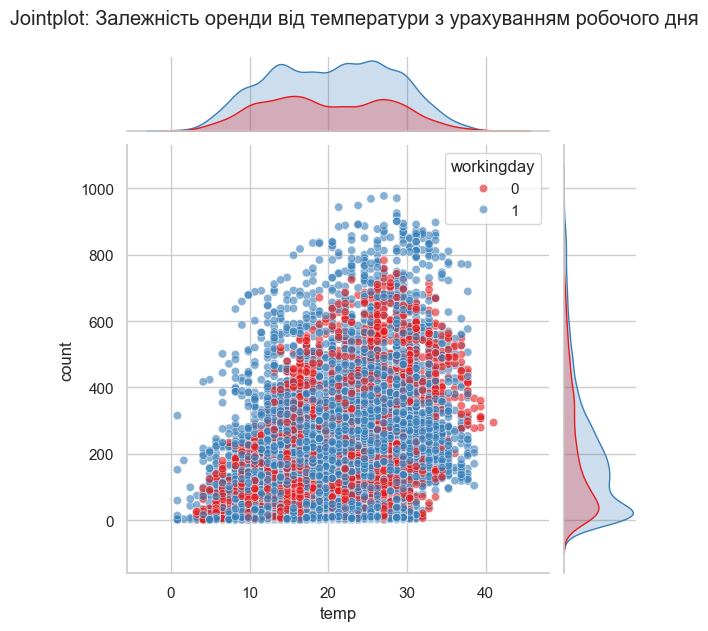

In [14]:
sns.jointplot(
    data=df,
    x="temp",
    y="count",
    hue="workingday",
    kind="scatter",
    palette="Set1",
    alpha=0.6
)
plt.suptitle("Jointplot: Залежність оренди від температури з урахуванням робочого дня", y=1.05)
plt.show()

Верхній графік — це розподіл температури, окремо для робочих та неробочих днів.
Бічний правий графік — це розподіл кількості оренд, також окремо для робочих та неробочих днів
В яких діапазонах значень зосереджені температури та кількість оренд.
Як ці розподіли змінюються в залежності від того, чи це робочий день чи вихідний.
З підвищенням температури зростає оренда велосипедів
